In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api as sm 

In [2]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [3]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.columns = ['Month', 'Milk in Pounds per Cow']

In [5]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [7]:
df.drop(168, axis=0, inplace=True)

In [8]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [9]:
df['Month'] = pd.to_datetime(df['Month'])

In [10]:
df.set_index('Month', inplace = True)

In [11]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


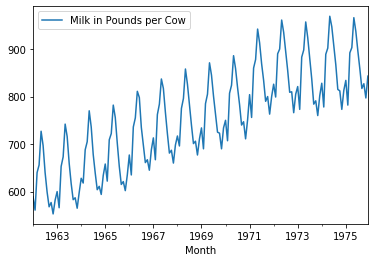

In [13]:
df.plot()

In [14]:
time_series = df['Milk in Pounds per Cow']

In [15]:
type(time_series)

pandas.core.series.Series

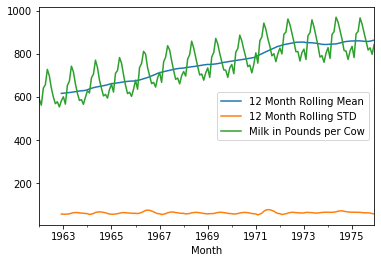

In [16]:
time_series.rolling(12).mean().plot(label = '12 Month Rolling Mean')
time_series.rolling(12).std().plot(label = '12 Month Rolling STD')
time_series.plot()
plt.legend()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
decomp = seasonal_decompose(time_series)

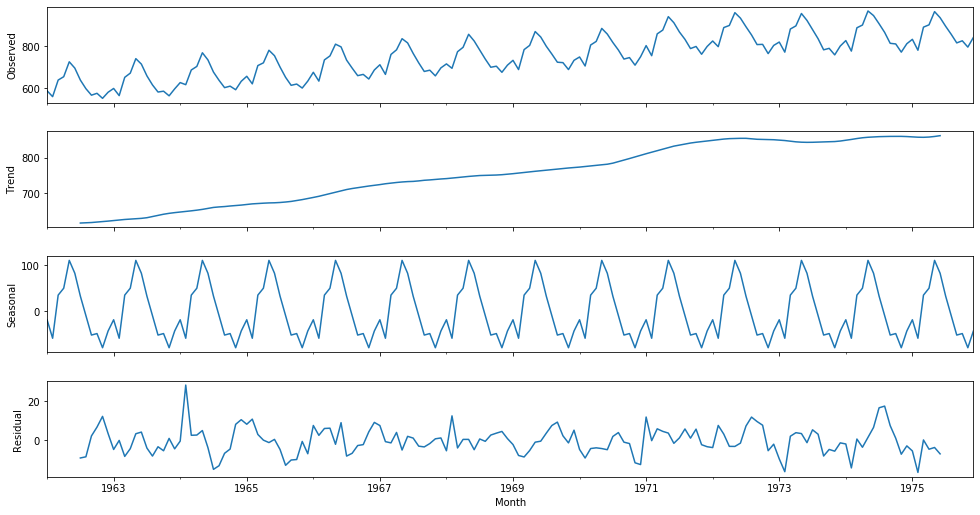

In [19]:
fig = decomp.plot()
fig.set_size_inches(15,8)

In [20]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
result = adfuller(df['Milk in Pounds per Cow'])

In [23]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistic','p-value','# of lags','# of Observations used']
    for value, label in zip(result, labels):
        print (label +' : '+ str(value))
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')
    

In [41]:
adf_check(time_series)

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.303811587422133
p-value : 0.6274267086030301
# of lags : 13
# of Observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [57]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1) 

168

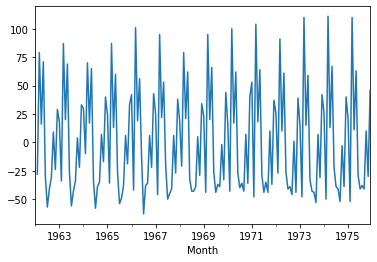

In [62]:
df['First Difference'].plot()

In [44]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.054995558653075
p-value : 0.030068004001785248
# of lags : 14
# of Observations used : 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [45]:
df['Second Difference'] = df['First Difference'] -  df['First Difference'].shift(1) 

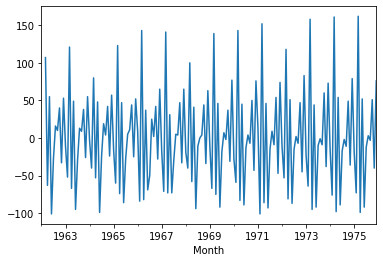

In [47]:
df['Second Difference'].plot()

In [48]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -14.327873645603434
p-value : 1.1126989332079236e-26
# of lags : 11
# of Observations used : 154
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [49]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12) 

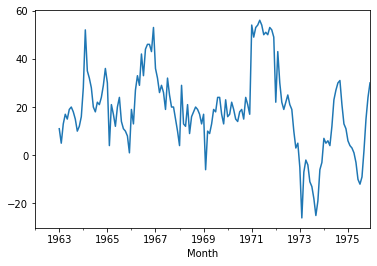

In [50]:
df['Seasonal Difference'].plot()

In [51]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.3354193143593975
p-value : 0.16079880527711365
# of lags : 12
# of Observations used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [52]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

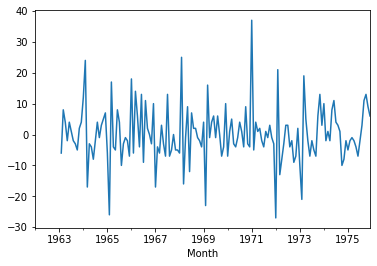

In [53]:
df['Seasonal First Difference'].plot()

In [54]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -5.038002274921982
p-value : 1.865423431878848e-05
# of lags : 11
# of Observations used : 143
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

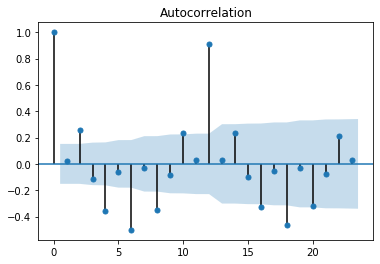

In [61]:
fig_first = plot_acf(df['First Difference'].dropna())

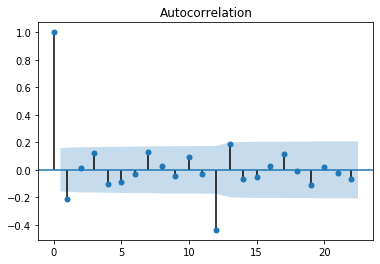

In [63]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

In [64]:
from pandas.plotting import autocorrelation_plot

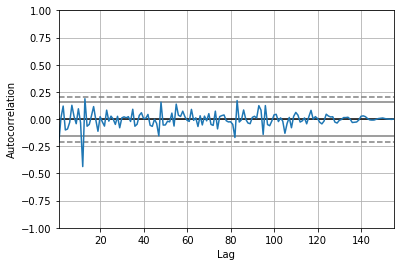

In [69]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

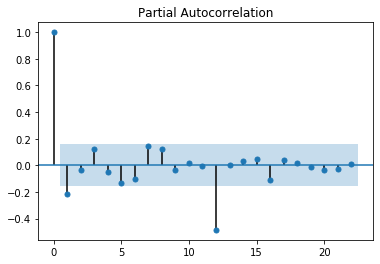

In [71]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

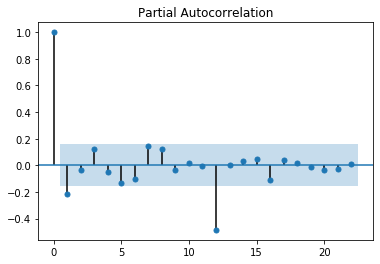

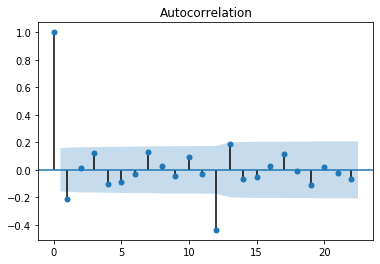

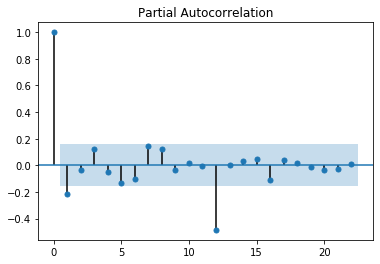

In [73]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())

In [74]:
from statsmodels.tsa.arima_model import ARIMA

In [75]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


In [78]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'], order=[0,1,0], seasonal_order=(1,1,1,12))

C:\Users\brama\Miniconda3\envs\fin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [79]:
result = model.fit()

In [80]:
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Tue, 19 Nov 2019   AIC                           1074.131
Time:                                    17:25:55   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

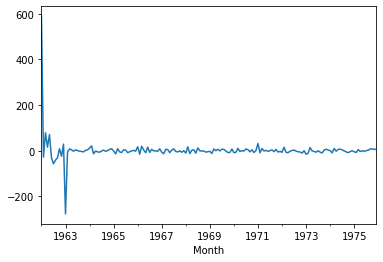

In [82]:
result.resid.plot()

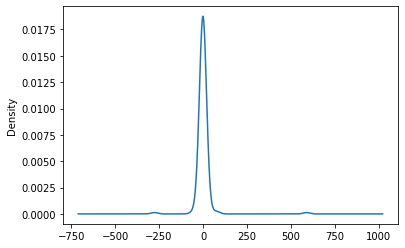

In [83]:
result.resid.plot(kind='kde')

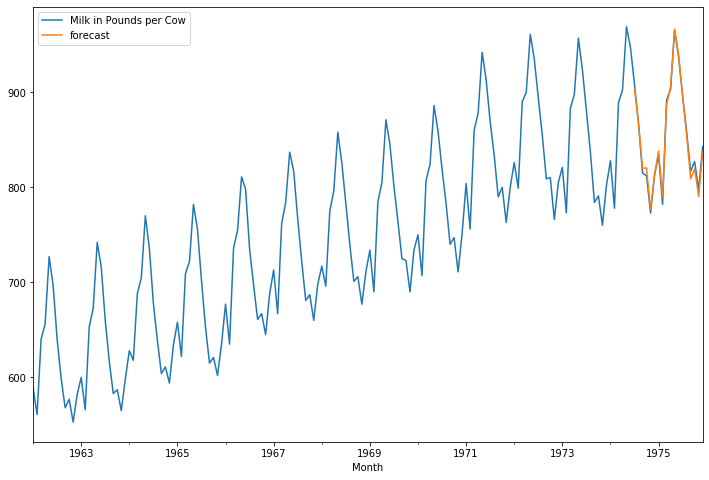

In [87]:
df['forecast'] = result.predict(start=150, end=168)
df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))

In [88]:
df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841371
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [89]:
from pandas.tseries.offsets import DateOffset

In [91]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [92]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [93]:
future_df = pd.DataFrame(index = future_dates, columns =df.columns)

In [95]:
final_df = pd.concat([df, future_df])

In [96]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
final_df['forecast'] = result.predict(start = 168, end = 192)

In [98]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525866
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918956
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881181
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027294
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962995


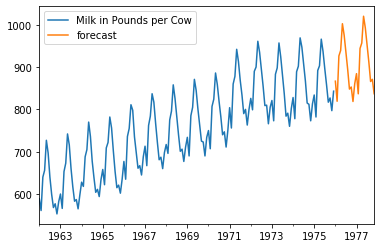

In [99]:
final_df[['Milk in Pounds per Cow','forecast']].plot()
plt.legend()